# DistMult

In [1]:
from util import *
import torch

In [2]:
s = Value(1.3, label='s')
p = Value(0.9, label='p')
o = Value(1.4, label='o')
sp = s*p; sp.label = 'sp'
spo = sp * o; spo.label = 'spo'
yhat = spo.sigmoid(); yhat.label = 'yhat'
# prediction
yhat.data

0.837262613340254

## Wikipedia: Cross Entropy Loss $$ H(p,q) = - \sum_{x \in X }p(x) log q(x),$$

The cross-entropy between two probability distributions p and q over the same underlying set of events measures the average number of bits needed to identify an event drawn from the set if a coding scheme used for the set is optimized for an estimated probability distribution q, rather than the true distribution p.
https://en.wikipedia.org/wiki/Cross_entropy

### $$ H(y,\hat{y}) = -y\log(\hat{y}_i)-(1-y)\log(1-\hat{y}) $$
where $y, \hat{y} \in [0,1] $ 

# Gradient of BCE

###  $$ \frac{\partial H}{\partial \hat y} = \frac{\hat y - y}{\hat y (1-\hat y)}$$

In [3]:
def bce(y,yhat):
    loss=-y*math.log(yhat) - (1-y)* math.log(1-yhat)
    grad = (yhat -y) / (yhat * (1-yhat))
    return loss,grad

In [4]:
loss, grad = bce(y=0.0,yhat=yhat.data)
loss, grad

(1.8156175022194463, 6.144869476679113)

In [5]:
yhat.backward(grad)

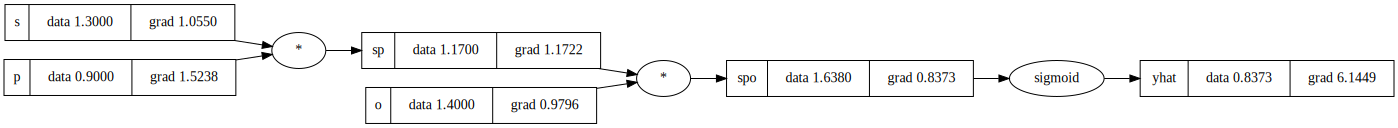

In [6]:
draw_dot(yhat)

In [7]:
# Sanity Checking with Pytorch
# Loss
print(bce(y=1.0,yhat=yhat.data))
def torch_checking_pos():
    # Torch Checking
    torch_yhat=torch.tensor(yhat.data,requires_grad=True)
    loss=torch.nn.functional.binary_cross_entropy(torch_yhat, torch.tensor(1.0))
    loss.backward()
    return loss.item(),torch_yhat.grad.item()
print(torch_checking_pos())

# Loss
print(bce(y=0.0,yhat=yhat.data))
def torch_checking_pos():
    # Torch Checking
    torch_yhat=torch.tensor(yhat.data,requires_grad=True)
    loss=torch.nn.functional.binary_cross_entropy(torch_yhat, torch.tensor(0.0))
    loss.backward()
    return loss.item(),torch_yhat.grad.item()
print(torch_checking_pos())

(0.17761750221944606, -1.1943683905943276)
(0.17761747539043427, -1.1943683624267578)
(1.8156175022194463, 6.144869476679113)
(1.815617561340332, 6.144869804382324)


# DistMult in $\mathbb{R}^4$

In [8]:
# (1) Subject Embeddings.
s1 = Value(0.1, label='s1')
s2 = Value(0.2, label='s2')
s3 = Value(0.3, label='s3')
s4 = Value(0.4, label='s4')
# (2) Predicate/Relation Embeddings.
p1 = Value(0.1, label='p1')
p2 = Value(0.2, label='p2')
p3 = Value(0.3, label='p3')
p4 = Value(0.4, label='p4')
# (3) Object Embeddings.
o1 = Value(-1.3, label='o1')
o2 = Value(1.3, label='o2')
o3 = Value(1.3, label='o3')
o4 = Value(1.3, label='o4')

# (4) Elementwise multiplication of (1) and (2).
sp1 = s1*p1; sp1.label = 'sp1'
sp2 = s2*p2; sp2.label = 'sp2'
sp3 = s3*p3; sp3.label = 'sp3'
sp4 = s4*p4; sp4.label = 'sp4'

# (5) Elementwise multiplication of (4) and (3).
spo1 = sp1*o1; spo1.label = 'spo1'
spo2 = sp2*o2; spo2.label = 'spo2'
spo3 = sp3*o3; spo3.label = 'spo3'
spo4 = sp4*o4; spo4.label = 'spo4'

# (6) Summation of (5).
logit = spo1+spo2+spo3+spo4 ;logit.label='logit'
# (7) Prediction.
yhat = logit.sigmoid() ;yhat.label='yhat'

# (8) Compute the loss and the derivative of the loss w.r.t. yhat
first_loss, grad = bce(y=1.0,yhat=yhat.data)
yhat,first_loss,grad

(Value(data=0.59000837522888), 0.5276185468799377, -1.6948911947429106)

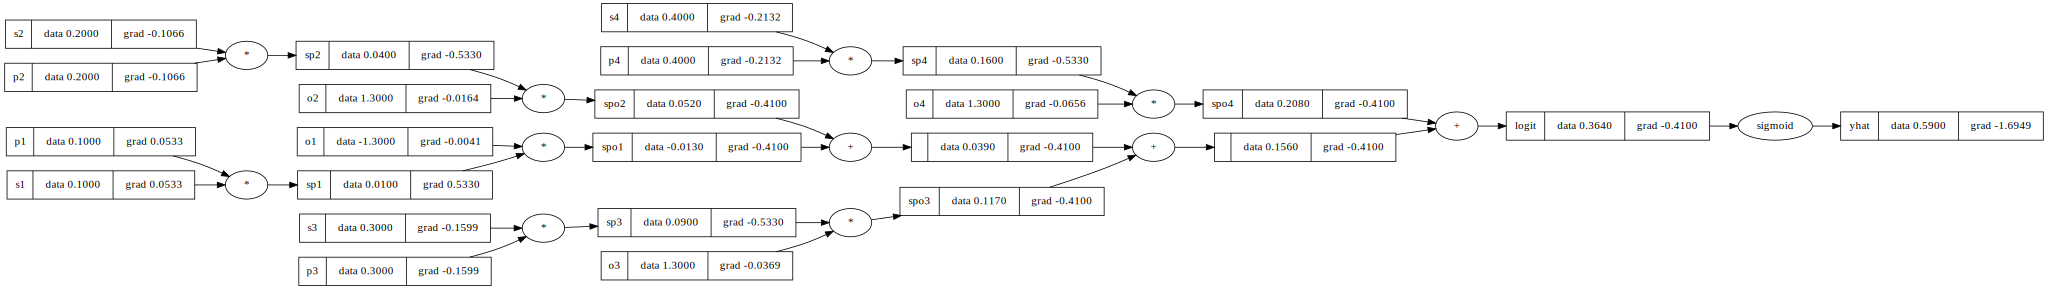

In [9]:
yhat.backward(grad)
draw_dot(yhat)

# Update Parameters in the negative direction of gradients

In [10]:
lr= 1.0
# (1) Update Subject Embeddings.
s1.data = s1.data -lr*s1.grad
s2.data = s2.data-lr*s2.grad
s3.data = s3.data-lr*s3.grad
s4.data = s4.data-lr*s4.grad
# (2) Update Predicate/Relation Embeddings.
p1.data = p1.data -lr*p1.grad
p2.data = p2.data -lr*p2.grad
p3.data = p3.data-lr*p3.grad
p4.data = p4.data-lr*p4.grad
# (3) Update Object Embeddings.
o1.data = o1.data-lr*o1.grad
o2.data = o2.data-lr*o2.grad
o3.data = o3.data-lr*o3.grad
o4.data = o4.data-lr*o4.grad

In [11]:
# (4) Elementwise multiplication of (1) and (2).
sp1 = s1*p1; sp1.label = 'sp1'
sp2 = s2*p2; sp2.label = 'sp2'
sp3 = s3*p3; sp3.label = 'sp3'
sp4 = s4*p4; sp4.label = 'sp4'

# (5) Elementwise multiplication of (4) and (3).
spo1 = sp1*o1; spo1.label = 'spo1'
spo2 = sp2*o2; spo2.label = 'spo2'
spo3 = sp3*o3; spo3.label = 'spo3'
spo4 = sp4*o4; spo4.label = 'spo4'

# (6) Summation of (5).
logit = spo1+spo2+spo3+spo4 ;logit.label='logit'
# (7) Prediction.
yhat = logit.sigmoid() ;yhat.label='yhat'

# (8) Compute the loss and the derivative of the loss w.r.t. yhat
second_loss, grad = bce(y=1.0,yhat=yhat.data)
yhat,second_loss,grad

(Value(data=0.7144623241753723), 0.3362250133378862, -1.3996539301833635)

In [12]:
first_loss,second_loss

(0.5276185468799377, 0.3362250133378862)

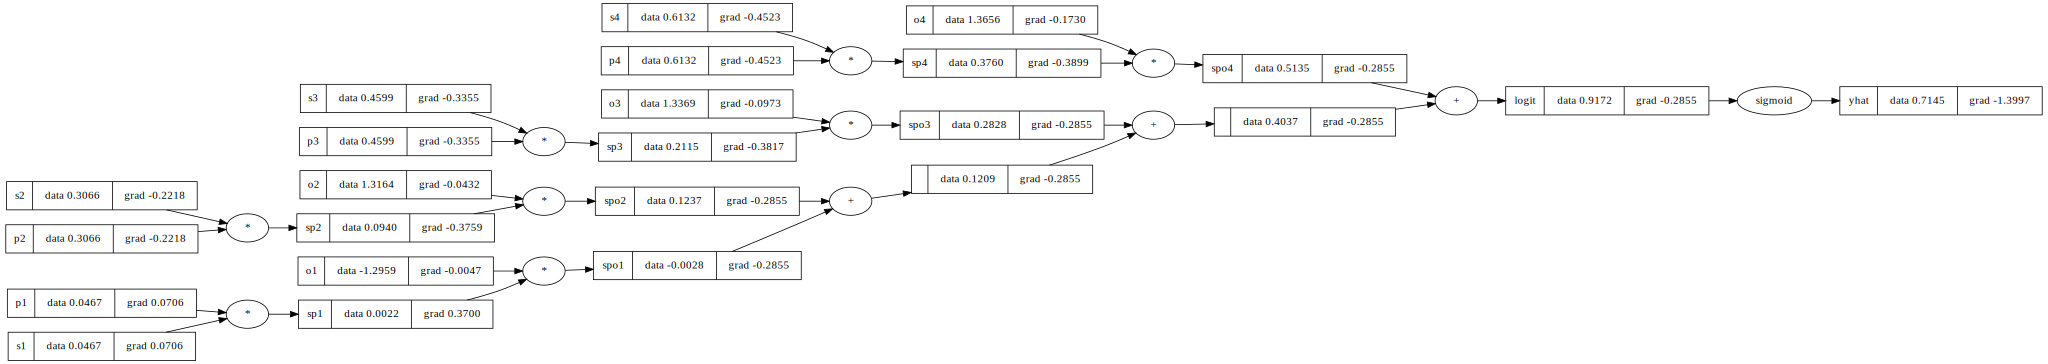

In [13]:
yhat.backward(grad)
draw_dot(yhat)